In [18]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
import re
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# CASE 1: Colored Convetion Project

In [10]:
filename = "../ccp_all.txt"

In [22]:
def name_cleaner(filename):
    clean_name = re.match(("(.*)(.txt)"), filename)
    clean_name = clean_name.group(1).strip('../')
    return clean_name

def nltk_ops(filename):

    clean_name = name_cleaner(filename)
    with codecs.open(filename, 'rU', 'utf-8') as f:  #'rU" strips newlines
        file = f.read()
        #file.encode('utf-8')
        #file = unicode(file, 'utf-8')
        file.strip()
        sentences = sent_tokenize(file)
        words = word_tokenize(file)
        words = [word for word in words if len(word) > 2]
        words = [word for word in words if not word in stop_words]
        for sentence in sentences:
            sentence_words = word_tokenize(sentence)      

    words = [word.lower() for word in words]
    words = [word for word in words if not word in stop_words]
    fdist = nltk.FreqDist(words)
    with open("%s_most_common_words.txt" % clean_name, "w") as outfile: 
        for word, frequency in fdist.most_common(50):
            frequency = str(frequency)
            outfile.write("{}\t{}\n".format(word,frequency))
        
    numbers = [word for word in words if word.isnumeric()]
    numbers = [number for number in numbers if len(number) >= 4]
    fdist_num = nltk.FreqDist(numbers)
    with open("%s_most_common_numbers.txt" % clean_name, "w") as outfile: 
        for word, frequency in fdist_num.most_common(50):
            frequency = str(frequency)
            outfile.write("{}\t{}\n".format(word,frequency))

    sentences = [sentence for sentence in sentences if len(sentence) > 15]
    fdist_sent = nltk.FreqDist(sentences)
    with open("%s_most_common_sentences.txt" % clean_name, "w") as outfile: 
        for sentence, frequency in fdist_sent.most_common(50):
           outfile.write("{}\t{}\n".format(sentence,frequency))
    
    data = [fdist,fdist_num,fdist_sent]
    return data

In [20]:
nltk_ops(filename)

In [24]:
tolstoy = nltk_ops('../tolstoy.txt')


<FreqDist with 20671 samples and 272689 outcomes>
<FreqDist with 20 samples and 165 outcomes>
<FreqDist with 25540 samples and 25560 outcomes>


In [25]:
for dist in tolstoy:
    print(dist.most_common(10))

[('said', 2834), ('one', 2104), ('pierre', 1949), ('prince', 1919), ('...', 1793), ('would', 1360), ('natásha', 1205), ('man', 1156), ('andrew', 1136), ('could', 1111)]
[('1812', 56), ('1805', 25), ('1809', 15), ('1806', 12), ('1813', 12), ('1807', 12), ('1811', 8), ('1808', 5), ('1810', 4), ('1820', 4)]
[('“Your excellency!', 3), ('Vive l’Empereur!', 3), ('All were silent.', 2), ('Prince Vasíli rose.', 2), ('They were silent for a while.', 2), ('“What’s to be done?', 2), ('Your excellency!', 2), ('The purse was not there.', 2), ('“Why are you going?', 2), ('It was Prince Andrew.', 2)]


In [2]:


with open('odnb_all_text.txt', 'rU') as f:
    file = f.read()
    #file = unicode(file, 'utf-8')
    file.strip()
    #sentences = sent_tokenize(file)
    words = word_tokenize(file)
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if not word in stop_words]
    numbers = [word for word in words if word.isnumeric()]
    numbers = [number for number in numbers if len(number) == 4]
    
    #for sentence in sentences:
        #sentence_words = word_tokenize(sentence)   
        #print(sentence_words)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
with open('ntlk_numbers.p', 'wb') as file:
    pickle.dump(numbers, file)

In [35]:
with open('ntlk_odnb_words.p', 'wb') as file:
    pickle.dump(words, file)

In [27]:


fdist = nltk.FreqDist(tolstoy[1])
years = pd.Series(fdist)
years = years.sort_index(ascending=True).reset_index().rename(columns={'index': 'Year', 0: 'Count'})


In [28]:
years

,Year,Count
0,1500,1
1,1789,3
2,1797,1
3,1805,25
4,1806,12
5,1807,12
6,1808,5
7,1809,15
8,1810,4
9,1811,8


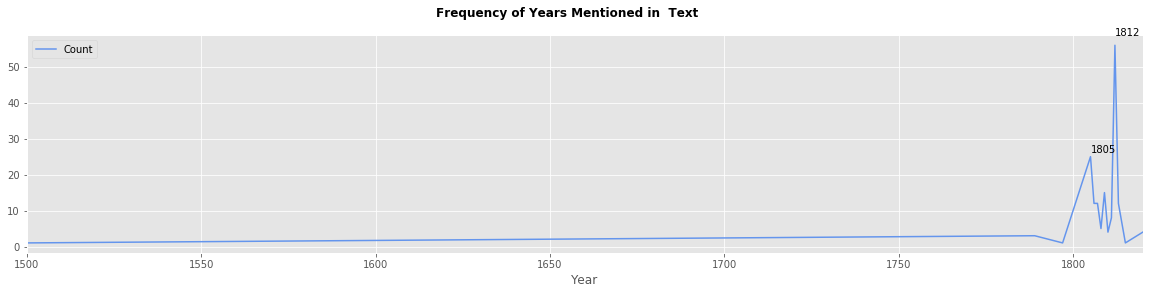

In [37]:
years['Year'] = pd.to_numeric(years['Year'])
data = years.loc[years['Year'].between(0,1900)]
data = data.set_index('Year')
#data.rename(columns={'index':'Year', '0':'Count'}, inplace=True)
fig, ax = plt.subplots(figsize=[20,4])
fig.suptitle('Frequency of Years Mentioned in  Text', fontweight='bold')
        
annotate_years = [1805, 1812]
for year in annotate_years:
    for index, row in data.loc[year:year].sort_values(by='Count', ascending=False).iterrows():
        ax.annotate(index,[index,1.05*row])

data.plot(color='cornflowerblue', ax=ax)
#fig.savefig('year_mentions_hi_res.png', dpi=1000)

In [36]:
data.sort_values(by='Count')
      

,Count
Year,
1500,1
1797,1
1815,1
1789,3
1810,4
1820,4
1808,5
1811,8
1806,12


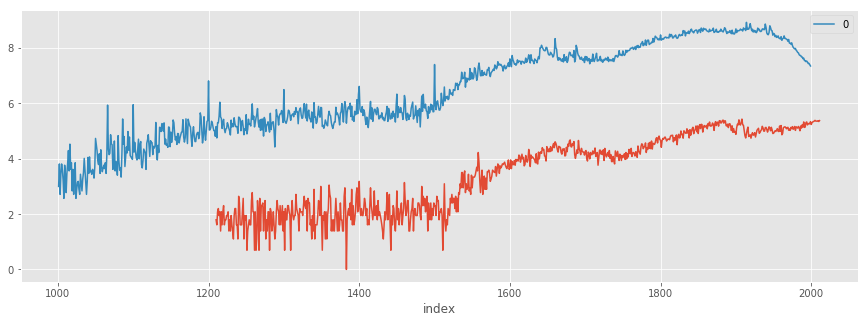

In [91]:
master = pd.read_csv("master_data_with_fuzzy_religion_for_converts_6_1_17.csv", low_memory=False)
decades = master['start_date_lb']
decades_counts = decades.value_counts()
decades_counts = decades_counts.sort_index()
decades2 = master['end_date_lb']
decades2_counts = decades2.value_counts()
decades2_counts = decades2_counts.sort_index()
decades_counts.rename("Approximate Birth Date", inplace=True)
decades2_counts.rename("Approximate Death Date", inplace=True)
fig, ax = plt.subplots()
#np.log(decades_counts[500:59524]).plot(figsize=(25,10), ax=ax, title="Number of ODNB Entries by Approximate Years of Birth and Death")



#decades_counts[500:59524].plot(figsize=(25,10), ax=ax, title="Historiography at Scale: People, Places, and Professions in the ODNB")
np.log(decades2_counts[500:59524]).plot(figsize=(15,5), ax=ax)
np.log(data).plot(ax=ax)

In [3]:
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(50):
    print(u'{}\t{}'.format(word, frequency))

's	627241
He	331770
The	236429
en	233024
In	198865
first	123085
London	116286
also	112759
John	112362
His	109610
one	98390
became	97299
years	90259
later	84587
two	80625
died	79905
em	77207
William	76835
work	76820
son	76765
time	76335
wife	75851
made	73665
Sir	72726
St	71186
daughter	69228
year	62164
published	61798
married	60583
life	58114
family	57041
death	56728
Thomas	56356
England	56167
College	56163
father	53222
new	53207
born	52896
British	52461
would	51243
On	51226
Henry	49829
second	49801
many	49583
appointed	48718
king	48586
James	48534
English	47915
early	47480
took	46706


In [4]:
words = [word.lower() for word in words]
words = [word for word in words if not word in stop_words]
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(50):
    print(u'{}\t{}'.format(word, frequency))

's	627248
en	233126
first	131095
london	116295
also	114219
john	112368
one	105980
became	97306
years	92067
later	89365
two	86985
died	79929
new	78857
son	77732
work	77711
time	77499
em	77219
william	76839
wife	76478
made	74056
sir	72859
may	71866
college	71300
st	71210
daughter	69570
king	68647
royal	66296
life	65527
year	62823
published	62127
church	61111
married	60822
family	58377
death	58112
second	56849
thomas	56360
england	56176
school	54814
father	54620
house	54060
born	53430
many	52921
british	52461
war	51979
would	51331
lord	50376
early	50373
henry	49832
appointed	49336
society	48893


## Questions to ask: 
- what years are mentioned most frequently in the ODNB? 
- how do word frequencies compare by male/female?
- how do word frequences compare by denomination / century?
- by new/revised?

In [ ]:
numbers = [word for word in words if word.isnumeric()]
# would be good to get only 4 digit numbers regex
fdist_num = nltk.FreqDist(numbers)
for word, frequency in fdist_num.most_common(300):
    print(u'{}\t{}'.format(word, frequency))

# here I create corpora for diffent kinds of inquiry, e.g. gender
## best done outside Jupyter notebook due to timeout issues building soup

In [ ]:
with open("/Users/user/Box Sync/Research/DH_Training_2016/articles.all.xml") as f:
    soup = BeautifulSoup(f, "lxml", from_encoding="utf-8")
    entries = soup('entry')

In [ ]:
with open('femaleIDs.txt') as f1, open('female_bios.txt','w') as f2:
    IDs = f1.readlines()
    for entry in entries:   
        text = entry.article_text.get_text()
        for line in iter(IDs):
            line = line.rstrip()
            # list = []    
            if line == entry['id']:    
                text += text
                print text
                f2.write(text.encode('utf-8'))
    f2.close()    

## here I perform the same operations as above, only on these smaller corpora

In [15]:
with open('revised_bios.txt') as f1:
    file = f1.read()
    file = unicode(file, 'utf-8')
    file.strip()
    sentences = sent_tokenize(file)
    words = word_tokenize(file)
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if not word in stop_words]
    for sentence in sentences:
        sentence_words = word_tokenize(sentence)   
        #print(sentence_words)','w') as f2:

In [16]:
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(50):
    print(u'{}\t{}'.format(word, frequency))

's	8220
He	4310
The	3310
In	3160
Quaker	2847
London	2067
also	1841
first	1784
became	1716
John	1711
Friends	1567
His	1557
years	1472
one	1399
died	1378
Society	1335
later	1321
work	1317
wife	1299
time	1207
family	1205
William	1180
two	1151
published	1132
She	1127
em	1102
married	1060
life	1045
Quakers	1028
daughter	996
son	992
children	988
born	948
many	898
year	873
made	873
father	870
England	840
home	835
school	829
meeting	829
Thomas	826
George	825
death	824
early	786
Mary	778
British	771
women	769
Fox	757
new	737


In [17]:
words = [word.lower() for word in words]
words = [word for word in words if not word in stop_words]
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(100):
    print(u'{}\t{}'.format(word, frequency))

's	8220
quaker	2850
london	2067
first	1917
also	1867
friends	1831
became	1716
john	1711
society	1675
one	1523
years	1497
later	1401
died	1378
work	1334
wife	1308
new	1273
school	1249
family	1222
time	1221
two	1220
life	1207
william	1180
published	1136
em	1102
married	1067
children	1044
quakers	1028
son	1009
daughter	1007
women	983
born	957
many	948
home	905
father	899
year	886
made	882
meeting	857
death	849
england	840
thomas	826
george	825
early	824
may	806
house	780
mary	778
british	771
fox	763
would	733
three	725
college	723
business	708
second	707
took	694
wrote	674
war	670
royal	640
moved	634
member	628
however	625
much	622
well	616
university	589
public	585
religious	583
elizabeth	572
near	564
including	562
church	551
continued	550
following	549
could	539
joseph	539
great	539
several	536
part	532
meetings	529
james	528
local	524
left	524
history	521
education	516
cq	515
oq	515
ukp	512
among	510
bristol	508
began	508
march	505
street	503
works	501
although	501
company	498
went	495

In [18]:
numbers = [word for word in words if word.isnumeric()]
numbers = [number for number in numbers if len(number) >= 4]
fdist_num = nltk.FreqDist(numbers)
for word, frequency in fdist_num.most_common(300):
    print(u'{}\t{}'.format(word, frequency))

1659	144
1655	138
1656	133
1660	131
1919	113
1654	110
1661	108
1846	108
1658	107
1657	107
1886	106
1847	102
1870	99
1914	97
1920	96
1865	95
1840	94
1889	92
1663	91
1662	91
1848	91
1910	90
1906	89
1907	89
1884	87
1837	87
1839	87
1841	86
1905	86
1900	84
1885	84
1664	83
1844	83
1918	83
1866	83
1868	83
1880	82
1912	82
1670	82
1850	82
1892	82
1836	81
1860	81
1881	80
1916	80
1895	80
1843	79
1902	79
1876	79
1859	79
1936	79
1684	78
1849	77
1874	77
1869	77
1853	77
1842	76
1864	76
1672	76
1903	75
1882	75
1867	75
1899	75
1894	75
1922	74
1940	73
1833	73
1831	73
1828	73
1858	73
1851	73
1896	73
1890	73
1683	73
1948	72
1834	72
1854	72
1883	71
1878	71
1857	71
1939	71
1665	70
1835	70
1891	70
1845	69
1904	69
1653	69
1826	69
1929	69
1862	69
1897	69
1909	68
1832	68
1915	68
1681	68
1825	68
1823	68
1852	68
1893	68
1908	67
1652	67
1911	67
1824	67
1676	67
1898	67
1888	66
1913	66
1855	66
1666	65
1923	65
1932	65
1818	64
1935	64
1678	63
1671	63
1947	62
1838	62
1873	62
1680	62
1933	62
1934	62
1946	61
1669	61
1887

In [19]:
fdist = nltk.FreqDist(sentences)
for sentence, frequency in fdist.most_common(200):
    print(u'{}\t{}'.format(sentence, frequency))

A.	10
and Phil.	9
6d.	7
He was survived by his wife.	6
Oxf., MS Rawl.	4
4d.	3
coll.	3
coll.).	3
His wife survived him.	3
There were no children.	3
MS 590/3.	2
A 32, fols.	2
A4r.	2
He was unmarried.	2
RO, Preston.	2
She never married.	2
12.	2
War or Brotherhood?	2
A2v.	2
They had no children.	2
The couple had no children.	2
They had ten children.	2
2, fol.	2
He never married.	2
They had five sons and four daughters.	2
a1r.	2
coll..	2
Oxf., MS Tanner 32, fol.	2
a week.	2
C. DavisJ.	2
15 no.	2
Meanwhile, the saints should wait meekly upon the Father's teaching, acting according to the golden rule and, if they must listen to other men's teachings, testing them against scripture without straining the text but giving precedence to those who spoke from their own spiritual experience.	1
In 1838 he visited France, Italy, Switzerland, and the Netherlands.	1
On 13 September 1855 he married Ursula 1835-1915, daughter of Joseph Mellor, a Liverpool merchant also of Quaker background.	1
From the mid-

## now same thing for men

In [ ]:
with open('maleIDs.txt') as f1, open('male_bios.txt','w') as f2:
    IDs = f1.readlines()
    for entry in entries:   
        text = entry.article_text.get_text()
        for line in iter(IDs):
            line = line.rstrip()
            # list = []    
            if line == entry['id']:    
                text += text
                print text
                f2.write(text.encode('utf-8'))
    f2.close() 

In [8]:
with open('male_bios.txt', 'rU') as f:
    file = f.read()
    file = unicode(file, 'utf-8')
    file.strip()
    sentences = sent_tokenize(file)
    words = word_tokenize(file)
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if not word in stop_words]
    for sentence in sentences:
        sentence_words = word_tokenize(sentence)   
        #print(sentence_words)

In [11]:
words = [word.lower() for word in words]
words = [word for word in words if not word in stop_words]
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(50):
    print(u'{}\t{}'.format(word, frequency))

's	1104982
en	383058
first	226678
london	202008
also	202002
john	199716
one	188058
became	172012
years	162000
later	157286
two	154184
new	141414
son	140070
died	138026
time	137622
william	136050
wife	135458
em	134776
work	134470
made	132798
college	131348
sir	130828
may	129956
st	128244
king	126974
royal	120788
daughter	119580
church	113482
year	113430
published	111562
life	109710
married	104840
england	101434
death	99884
thomas	99840
second	99814
british	95214
house	94292
father	93422
appointed	92936
lord	92796
many	92692
war	92674
school	92144
born	92116
would	91548
family	89672
early	88636
henry	87686
english	86956


In [ ]:
numbers = [word for word in words if word.isnumeric()]
# would be good to get only 4 digit numbers regex
fdist_num = nltk.FreqDist(numbers)
for word, frequency in fdist_num.most_common(300):
    print(u'{}\t{}'.format(word, frequency))

In [10]:
fdist = nltk.FreqDist(sentences)
for sentence, frequency in fdist.most_common(100):
    print(u'{}\t{}'.format(sentence, frequency))

coll.	1154
They had no children.	622
coll.)	590
6d.	572
8d.	560
4d.	514
coll.).	502
He was survived by his wife.	412
His wife survived him.	346
A.	306
Oxf., MS Rawl.	302
J.	292
He never married.	224
B.	200
Oxon.	192
He was unmarried.	190
They had two daughters.	182
Oxf., MS Eng.	182
They had a son and a daughter.	182
There were no children.	156
1.	142
They had two sons and two daughters.	140
They had two sons.	132
a week.	126
They had one daughter.	124
They had two sons and a daughter.	120
They had one son.	120
A2r.	116
There were no children of the marriage.	110
C. BoaseH.	108
They had one son and one daughter.	100
Limerick.	100
2.	96
0d.	94
4.	86
A3v.	84
lett.	82
2d.	82
They had one son and two daughters.	82
They had two sons and one daughter.	80
10d.	78
misc.	78
They had three sons and two daughters.	76
9d.	76
U. Oxf.	76
3d.	76
There were no children of either marriage.	74
He was survived by his second wife.	70
They had two sons and three daughters.	68
A2.	68
They had a son and two 

# Now for 04 edition and post 04 edition

In [4]:
#creates subcorpus
with open('ODNB_IDs_04.txt') as f1, open('ODNB_04_bios.txt','w') as f2:
    IDs = f1.readlines()
    for entry in entries:   
        text = entry.article_text.get_text()
        for line in iter(IDs):
            line = line.rstrip()
            # list = []    
            if line == entry['id']:    
                text += text
                print text
                f2.write(text.encode('utf-8'))
    f2.close() 

NameError: name 'entries' is not defined

In [6]:
with open('ODNB_04_bios.txt', 'rU') as f:
    file = f.read()
    file = unicode(file, 'utf-8')
    file.strip()
    sentences = sent_tokenize(file)
    words = word_tokenize(file)
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if not word in stop_words]
    for sentence in sentences:
        sentence_words = word_tokenize(sentence)   
        #print(sentence_words)

In [7]:
words = [word.lower() for word in words]
words = [word for word in words if not word in stop_words]
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(50):
    print(u'{}\t{}'.format(word, frequency))

's	617850
en	234442
first	131080
london	125622
john	123098
also	117838
one	107652
became	104074
years	95448
died	94108
two	89686
later	89652
son	87856
work	84540
college	83896
william	83702
wife	83536
st	83442
new	77666
daughter	77326
time	76832
may	75604
sir	73812
made	73724
published	72608
royal	71168
church	70928
king	69020
married	68450
year	67034
life	65866
em	65044
death	63700
thomas	62594
born	62450
school	59772
england	58964
second	57982
father	57104
family	56582
appointed	56560
society	55018
many	53698
house	53090
james	52558
early	51102
three	49610
henry	49552
english	49368
university	48784


In [14]:
numbers = [word for word in words if word.isnumeric()]
numbers = [number for number in numbers if len(number) >= 4]
fdist_num = nltk.FreqDist(numbers)
for word, frequency in fdist_num.most_common(300):
    print(u'{}\t{}'.format(word, frequency))

1854	7566
1841	7342
1857	7318
1847	7220
1840	7204
1852	7154
1855	7146
1860	7096
1846	7076
1848	7044
1859	7040
1858	7006
1870	7000
1865	6972
1842	6946
1851	6926
1837	6834
1874	6802
1869	6758
1830	6756
1868	6752
1845	6740
1839	6718
1919	6684
1850	6668
1867	6660
1832	6642
1914	6610
1856	6574
1843	6574
1862	6538
1885	6534
1866	6524
1861	6480
1844	6456
1886	6412
1880	6398
1835	6386
1834	6378
1836	6366
1853	6356
1863	6344
1831	6322
1864	6308
1872	6304
1849	6278
1876	6276
1939	6268
1838	6266
1881	6198
1873	6194
1884	6174
1878	6172
1882	6172
1825	6146
1877	6146
1910	6128
1879	6118
1875	6086
1828	6036
1871	5996
1920	5984
1814	5974
1883	5948
1829	5922
1887	5922
1812	5920
1895	5884
1906	5868
1827	5864
1892	5854
1900	5846
1889	5840
1891	5836
1945	5828
1824	5818
1902	5782
1908	5780
1907	5778
1904	5762
1820	5728
1929	5728
1905	5726
1911	5722
1826	5708
1815	5706
1813	5696
1800	5684
1903	5684
1833	5680
1818	5644
1918	5628
1946	5614
1893	5606
1890	5570
1888	5538
1819	5522
1931	5520
1823	5446
1810	5428


In [19]:
sentences = [sentence for sentence in sentences if len(sentence) > 15]
fdist = nltk.FreqDist(sentences)
for sentence, frequency in fdist.most_common(20):
    print(u'{}\t{}'.format(sentence, frequency))

They had no children.	418
He was survived by his wife.	290
His wife survived him.	216
He never married.	158
He was unmarried.	136
They had two daughters.	118
They had a son and a daughter.	98
There were no children.	96
They had two sons and two daughters.	90
They had two sons.	82
They had one son.	76
There were no children of the marriage.	72
She never married.	66
They had one son and two daughters.	64
They had one daughter.	64
They had two sons and a daughter.	58
They had three sons and two daughters.	52
They had two sons and three daughters.	50
He was survived by his wife.J.	48
They had one son and one daughter.	48


In [20]:
with open('ODNB_IDs_post_04_supplements_bios.txt', 'rU') as f:
    file = f.read()
    file = unicode(file, 'utf-8')
    file.strip()
    sentences = sent_tokenize(file)
    words = word_tokenize(file)
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if not word in stop_words]
    for sentence in sentences:
        sentence_words = word_tokenize(sentence)   
        #print(sentence_words)

In [21]:
words = [word.lower() for word in words]
words = [word for word in words if not word in stop_words]
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(50):
    print(u'{}\t{}'.format(word, frequency))

's	618188
en	195290
first	124574
also	106130
london	103786
one	101078
john	91470
became	87812
em	87542
later	86606
years	86300
two	81232
new	77972
time	76198
made	72512
work	69294
wife	67094
may	65458
king	65446
sir	64998
life	63398
william	62564
son	62238
died	61928
would	60874
royal	59566
war	59050
daughter	58698
college	57928
year	57056
british	56886
st	56840
house	53420
second	52522
england	52040
published	50876
many	50844
family	50788
lord	50352
married	49884
church	49856
death	49774
father	49384
school	48920
early	47980
henry	46060
english	45542
however	45182
took	44950
thomas	44608


In [22]:
numbers = [word for word in words if word.isnumeric()]
numbers = [number for number in numbers if len(number) >= 4]
fdist_num = nltk.FreqDist(numbers)
for word, frequency in fdist_num.most_common(300):
    print(u'{}\t{}'.format(word, frequency))

1914	7966
1939	7502
1919	7210
1945	7118
1940	7012
1918	6664
1946	6578
1916	6370
1936	6178
1935	6158
1929	6144
1920	6132
1937	6062
1917	6060
1938	6040
1915	6014
1922	5982
1948	5964
1912	5942
1931	5862
1947	5812
1911	5774
1910	5744
1924	5704
1930	5694
1944	5686
1900	5628
1941	5618
1921	5614
1913	5604
1926	5598
1906	5538
1950	5530
1934	5520
1964	5520
1933	5474
1951	5440
1932	5410
1885	5398
1928	5384
1942	5376
1908	5372
1907	5316
1943	5274
1925	5200
1909	5186
1923	5178
1960	5168
1905	5130
1963	5120
1886	5112
1902	5096
1956	5088
1965	5088
1970	5064
1904	5048
1966	5044
1899	5032
1953	5030
1895	5028
1955	5004
1903	5002
1949	4956
1952	4940
1892	4934
1968	4930
1927	4926
1962	4924
1957	4910
1880	4906
1967	4876
1954	4858
1958	4828
1959	4768
1884	4728
1870	4726
1901	4676
1897	4660
1969	4650
1961	4576
1974	4550
1887	4528
1896	4520
1893	4520
1874	4510
1889	4466
1881	4464
1890	4462
1898	4420
1972	4384
1878	4368
1857	4366
1882	4366
1971	4364
1879	4356
1865	4356
1894	4344
2000	4294
1858	4290
1891	4288


In [23]:
sentences = [sentence for sentence in sentences if len(sentence) > 15]
fdist = nltk.FreqDist(sentences)
for sentence, frequency in fdist.most_common(20):
    print(u'{}\t{}'.format(sentence, frequency))

They had no children.	260
His wife survived him.	130
He was survived by his wife.	122
They had a son and a daughter.	88
They had two daughters.	78
They had one daughter.	72
There were no children.	72
They had two sons and a daughter.	68
He never married.	66
They had two sons and two daughters.	58
They had one son and one daughter.	58
There were no children of the marriage.	56
He was unmarried.	54
They had two sons.	54
They had one son.	46
They had two sons and one daughter.	42
There were no children of either marriage.	42
She never married.	40
They had three daughters.	36
They had three sons and two daughters.	30


# Revised vs. Unrevised

In [2]:
with open('revised_bios.txt', 'rU') as f:
    file = f.read()
    file = unicode(file, 'utf-8')
    file.strip()
    sentences = sent_tokenize(file)
    words = word_tokenize(file)
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if not word in stop_words]
    for sentence in sentences:
        sentence_words = word_tokenize(sentence)   
        #print(sentence_words)

In [3]:
words = [word.lower() for word in words]
words = [word for word in words if not word in stop_words]
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(50):
    print(u'{}\t{}'.format(word, frequency))

's	165050
en	85568
first	47310
london	44666
became	41836
john	38608
college	38376
died	36914
also	36248
years	35950
daughter	34256
one	34028
son	33940
sir	31472
royal	30900
wife	30358
two	30266
work	29848
appointed	28954
published	28516
made	28252
later	27626
st	27284
married	26888
william	26520
born	26054
time	25596
school	24998
year	23918
society	23668
second	23090
new	22888
may	22554
university	21224
life	20730
british	20548
church	20478
war	20026
many	19598
death	18632
june	18584
england	18558
lord	18374
took	18310
thomas	18260
father	17746
house	17718
january	17636
march	17382
three	17268


In [4]:
numbers = [word for word in words if word.isnumeric()]
numbers = [number for number in numbers if len(number) >= 4]
fdist_num = nltk.FreqDist(numbers)
for word, frequency in fdist_num.most_common(300):
    print(u'{}\t{}'.format(word, frequency))

1854	4556
1857	4278
1841	4278
1855	4212
1860	4110
1858	4080
1852	4078
1870	3994
1846	3978
1842	3908
1847	3884
1840	3880
1848	3830
1837	3808
1880	3802
1859	3762
1843	3760
1851	3756
1874	3756
1856	3746
1865	3736
1853	3710
1885	3698
1830	3696
1845	3676
1886	3658
1861	3644
1862	3628
1868	3624
1850	3620
1863	3614
1814	3612
1881	3578
1867	3568
1878	3562
1832	3558
1877	3556
1835	3536
1849	3526
1869	3516
1831	3512
1872	3504
1866	3494
1812	3482
1836	3474
1839	3474
1873	3468
1882	3458
1834	3436
1876	3432
1838	3416
1875	3412
1813	3410
1844	3398
1879	3378
1871	3374
1815	3368
1825	3368
1919	3336
1864	3300
1884	3294
1887	3178
1828	3172
1939	3168
1829	3162
1818	3136
1826	3134
1824	3108
1883	3108
1811	3100
1914	3098
1827	3084
1809	3082
1892	3068
1833	3058
1889	3050
1900	3036
1819	3030
1895	3028
1820	3012
1810	3004
1806	2966
1902	2964
1808	2954
1945	2952
1800	2936
1823	2918
1906	2918
1805	2914
1904	2908
1821	2864
1901	2864
1903	2854
1890	2852
1807	2850
1891	2850
1905	2846
1893	2830
1888	2824
1910	2812


In [5]:
sentences = [sentence for sentence in sentences if len(sentence) > 15]
fdist = nltk.FreqDist(sentences)
for sentence, frequency in fdist.most_common(20):
    print(u'{}\t{}'.format(sentence, frequency))

They had no children.	262
He was survived by his wife.	116
His wife survived him.	102
He was unmarried.	94
They had a son and a daughter.	78
There were no children.	72
They had two sons.	68
They had two daughters.	66
They had two sons and a daughter.	62
They had two sons and two daughters.	62
He never married.	60
They had one daughter.	58
They had one son.	54
He was survived by his wife.W.	46
They had one son and two daughters.	42
He was survived by his wife.J.	40
His wife survived him.J.	38
There were no children of the marriage.	36
They had one son and one daughter.	36
They had three sons and two daughters.	34


In [ ]:
with codecs.open("new_demo.xml", 'r' 'utf-8') as f:
    #soup = BeautifulSoup(f, "lxml", from_encoding="utf-8")
    soup = BeautifulSoup(f, "lxml") 
    entries = soup('entry')
    
with open('revisedIDs.txt') as f1, open('test_revised_bios.txt','w') as f2:
    IDs = f1.readlines()
    for entry in entries:   
        text = entry.article_text.get_text()
        text = re.sub('&en;','-',text)
        text = re.sub('&en;','—',text)
        for line in iter(IDs):
            line = line.rstrip()
            # list = []    
            if line == entry['id']:    
                print text
                f2.write(text.encode('utf-8'))
                #f2.write(text.encode('ISO-8859-1'))
    f2.close() 
    